## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df3= pd.merge(mouse_metadata,study_results)
# Display the data table for preview
df3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice= df3["Mouse ID"].value_counts()
number_of_mice=len(mice)
len(mice)

249

In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
#Truncated info for Mouse ID column
df3.loc[:,"Mouse ID"]


0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [5]:
 #Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
d_m_d= df3.loc[:'Mouse ID', 'Timepoint']
#DMD = Duplicate Mouse Data
display(d_m_d)

0        0
1        5
2       10
3       15
4       20
        ..
1888    25
1889    30
1890    35
1891    40
1892    45
Name: Timepoint, Length: 1893, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
d_m_d=df3[df3.duplicated(['Mouse ID',])]
d_m_d


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#label duplicated mice as =false
Droped_mouse =d_m_d["Mouse ID"]== df3.duplicated
Droped_mouse

1       False
2       False
3       False
4       False
5       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1644, dtype: bool

In [8]:
Droped_mouse.count()

1644

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

deleted = Droped_mouse.dropna(how=any)
deleted.count()

1644

In [10]:
# Checking the number of mice in the cleaned DataFrame.
klean_df=df3
klean_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

### Check if Clean and free of erroneous information
klean_df.count()


In [11]:
 #Summary Statistics
regimen_mean = klean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = klean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = klean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = klean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = klean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem 


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: _group_by = klean_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = klean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
sumstats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
sumstats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Using the aggregation method, produce the same summary statistics in a single line

#Groupby drug regimen with .count and mouse id to determine the datapoints
Drugreg_data_points = klean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
Drugreg_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

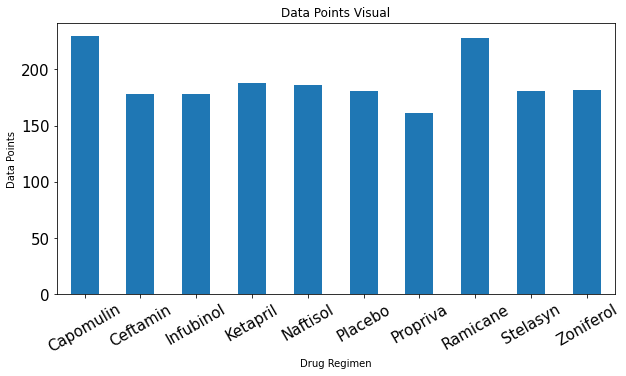

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drugreg_data_points.plot(kind="bar",figsize=(10,5),fontsize = 15)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks (rotation=30)

# Alter the dataframe down to two columns
plt.show()
plt.tight_layout()

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Medication_list = Drugreg_data_points.index.tolist()
Medication_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

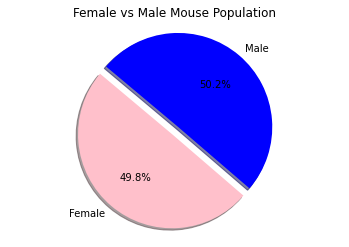

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels = ["Female","Male"]
plt.title('Female vs Male Mouse Population')
#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

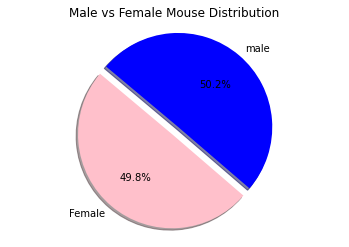

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","male"]
plt.title('Male vs Female Mouse Distribution')
#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimes = klean_df[klean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatment_regimes = klean_df.sort_values(["Timepoint"], ascending=True)
treatment_regimes

treatment_regimes_data = klean_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

treatment_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1,Ramicane,k403,5,38.825898
2,Ramicane,k403,10,35.014271
3,Ramicane,k403,15,34.223992
4,Ramicane,k403,20,32.997729
...,...,...,...,...
1888,Naftisol,z969,25,63.145652
1889,Naftisol,z969,30,65.841013
1890,Naftisol,z969,35,69.176246
1891,Naftisol,z969,40,70.314904


In [69]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_df = klean_df.loc[klean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = klean_df.loc[ klean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = klean_df.loc[ klean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = klean_df.loc[ klean_df["Drug Regimen"] == "Ceftamin", :]
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol,  klean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [74]:
Ceftamin_tumors = Ceftamin_df["Tumor Volume (mm3)"]

quartiles2 =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ceftamin potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")
Ceftamin_tumors.head()

Ceftamin potential outliers could be values below 32.818911426250004 and above 71.19095325625 could be outliers.


484    45.000000
485    46.795257
486    47.371343
487    49.734404
488    50.513437
Name: Tumor Volume (mm3), dtype: float64

In [75]:
Infubinol_tumors = Infubinol_df["Tumor Volume (mm3)"]

quartiles2 = Infubinol_tumors.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Infubinol potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")
Infubinol_tumors.head()

Infubinol potential outliers could be values below 32.309217298749985 and above 72.31757996875001 could be outliers.


454    45.000000
455    48.508468
456    51.852437
457    52.777870
458    55.173336
Name: Tumor Volume (mm3), dtype: float64

In [76]:
Ramicane_tumors = Ramicane_df["Tumor Volume (mm3)"]

quartiles2 = Ramicane_tumors.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")
Ramicane_tumors.head()

Ramicane potential outliers could be values below 24.18658646249998 and above 57.48804812250001 could be outliers.


0    45.000000
1    38.825898
2    35.014271
3    34.223992
4    32.997729
Name: Tumor Volume (mm3), dtype: float64

In [52]:
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


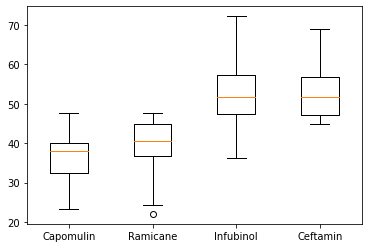

In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#sns.boxplot (y='Final Tumor Volume (mm3)','x='Drug Regimen', data='Capomulin_tumors,Ramicane_tumors,Infubinol_tumors,Ceftamin_tumors',width = 0.5,palette= "Purple")
#data_to_plot = [Capomulin_tumors,Ramicane_tumors,Infubinol_tumors,Ceftamin_tumors]
fig1,sns = plt.subplots()
ax1.set_title("Final Tumor Volume in 4 Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
sns.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

In [104]:
capmouse_j119 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "j119",:]
capmouse_j119.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
328,j119,Capomulin,Female,7,23,0,45.000000,0
329,j119,Capomulin,Female,7,23,5,45.838998,0
330,j119,Capomulin,Female,7,23,10,46.425366,0
331,j119,Capomulin,Female,7,23,15,47.322984,0
332,j119,Capomulin,Female,7,23,20,48.158209,1


In [137]:
#%matplotlib notebook

## Line and Scatter Plots

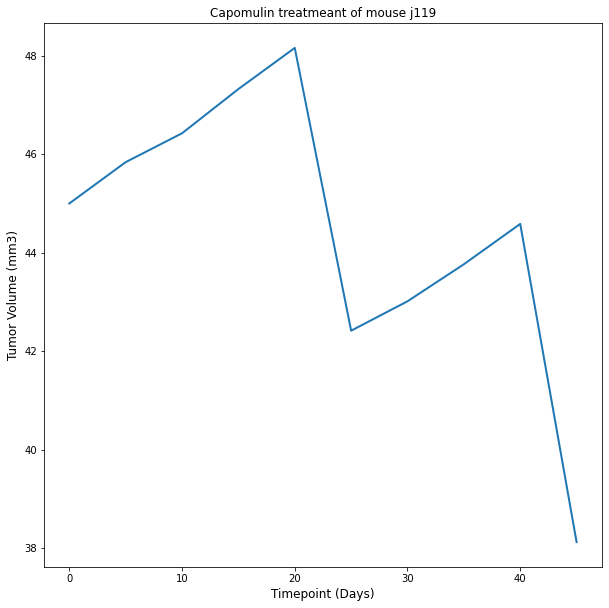

In [105]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = capmouse_j119["Timepoint"]
tumsiz = capmouse_j119["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.title('Capomulin treatmeant of mouse j119',fontsize =12)
plt.plot(x_axis,tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)


plt.savefig('linechart')
plt.show()

In [87]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

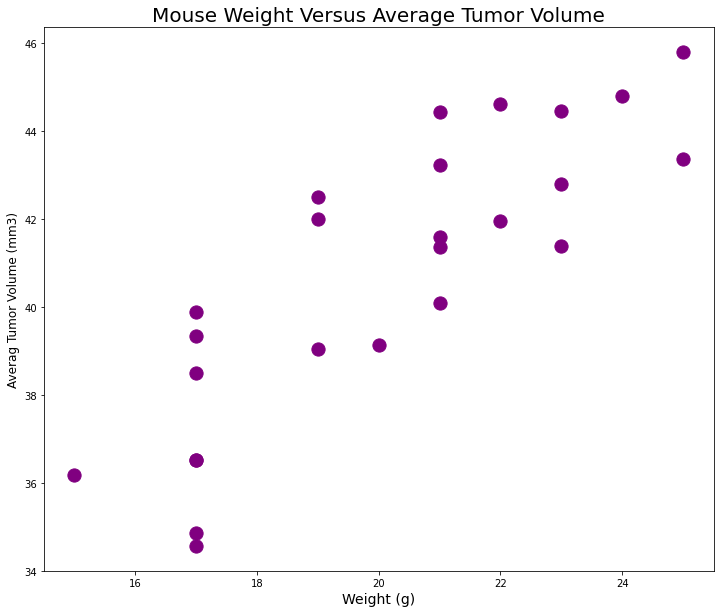

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(12, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="purple")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =12)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")

## Correlation and Regression

In [115]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [116]:
model=st.linregress(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [117]:
#avg_capm_vol['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

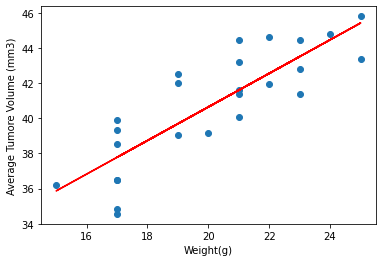

In [126]:
y_values = avg_capm_vol['Weight (g)']*mslope+bintercept
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.plot(avg_capm_vol['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('regression')
plt.show()